In [19]:
from sklearn import datasets
import matplotlib.pyplot as plot
import math

In [20]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.target_names


Text(0.5, 1.0, 'Sepal size distribution')

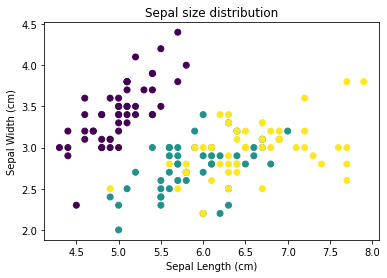

In [21]:
# Select all rows and only first two columns (sepal length/width)
points = iris.data[:, :2]
 
# Target will be used to plot samples in different colors for different species
color = iris.target
 
plot.scatter(points[:,0], points[:,1], c=color)
plot.xlabel('Sepal Length (cm)')
plot.ylabel('Sepal Width (cm)')
plot.title('Sepal size distribution')

Text(0.5, 1.0, 'Petal size distribution')

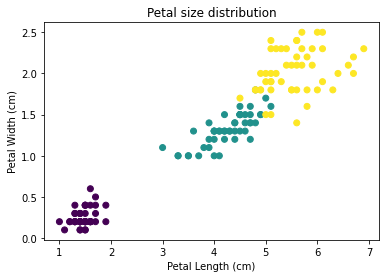

In [22]:
# Select all rows and only first two columns (sepal length/width)
points = iris.data[:, 2:]
 
# Target will be used to plot samples in different colors for different species
color = iris.target
 
plot.scatter(points[:,0], points[:,1], c=color)
plot.xlabel('Petal Length (cm)')
plot.ylabel('Petal Width (cm)')
plot.title('Petal size distribution')

Text(0.5, 1.0, 'Parabola')

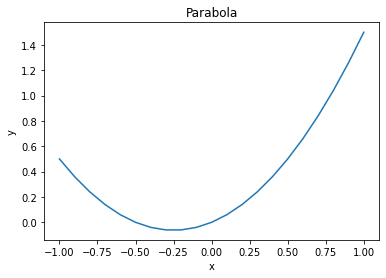

In [23]:
def parabola(x):
    return x**2 + x/2.0
 
def derivative(x):
  return 2*x + 0.5
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plot.plot(x, y)
plot.xlabel('x')
plot.ylabel('y')
plot.title('Parabola')


Text(0.5, 1.0, 'Second Function')

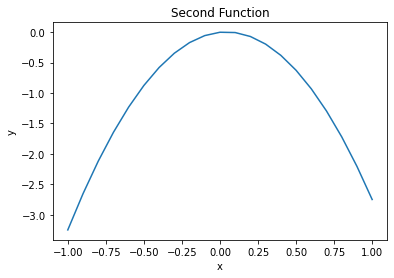

In [73]:
def second_func(x):
    return -3*x**2 + x/4.0

def second_deriv(x):
    return 6*x + 0.25

x = [i * 0.1 for i in range(-10, 11)]
y = [second_func(var) for var in x]
plot.plot(x, y)
plot.xlabel('x')
plot.ylabel('y')
plot.title("Second Function")

Estimated minimum -0.25, -0.06
Derivative (gradient) 0.00


Text(0.5, 1.0, 'Parabola')

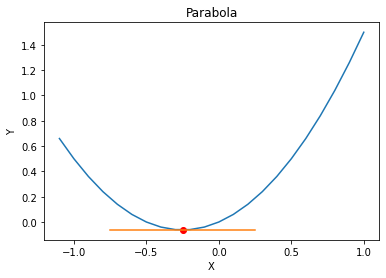

In [57]:
x_k = 0.0
 
# Experiment with these two hyperparameters
learning_rate = .5
epochs = 2

for i in range(epochs):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient
 
print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)
 
x = [i * 0.1 for i in range(-11, 11)]
y = [parabola(xi) for xi in x]
plot.plot(x, y)
plot.xlabel('X')
plot.ylabel('Y')
plot.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plot.plot(line_x, line_y)
plot.title('Parabola')

Estimated minimum -0.04, -0.02
Derivative (gradient) 0.00


Text(0.5, 1.0, 'Second Parabola')

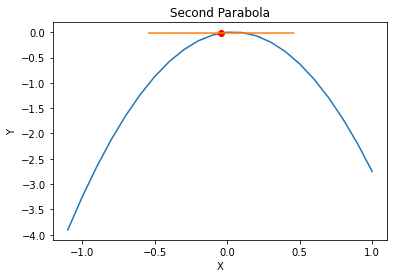

In [74]:
# Second iteration
x_k = 0.0

second_learn_rate = .1
second_epochs = 7

for i in range(second_epochs):
    second_gradient = second_deriv(x_k)
    x_k = x_k - second_learn_rate * second_gradient

print('Estimated minimum %0.2f, %0.2f' % (x_k, second_func(x_k)))
print('Derivative (gradient) %0.2f' % second_gradient)

test_x = [i * 0.1 for i in range(-11, 11)]
test_y = [second_func(xi) for xi in test_x]
plot.plot(test_x, test_y)
plot.xlabel("X")
plot.ylabel("Y")
plot.plot(x_k, second_func(x_k), 'ro')
lined_x = [x_k - 0.5, x_k + 0.5]
lined_y = [second_gradient*(xi - x_k) + second_func(x_k) for xi in lined_x]
plot.plot(lined_x, lined_y)
plot.title("Second Parabola")

Text(0.5, 1.0, 'Logistic Sigmoid')

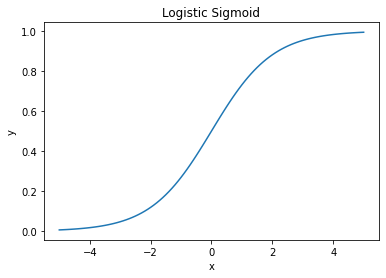

In [76]:
def sigmoid(z):
  # return the sigmoid of z
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plot.plot(x, y)
plot.xlabel('x')
plot.ylabel('y')
plot.title('Logistic Sigmoid')

In [26]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

In [27]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [28]:
num_features = iris.data.shape[1]
 
def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0
 
  global bias, weights
 
  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

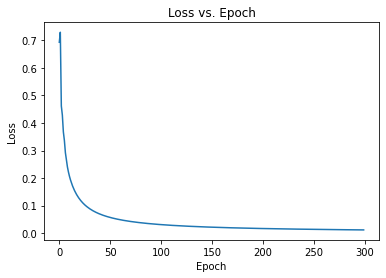

In [29]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = .2

epochs = 300

x_train_samples = iris.data
y_train_samples = [1 if y == 0 else 0 for y in iris.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plot.plot(range(epochs), loss_array)
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.title('Loss vs. Epoch')
plot.show()

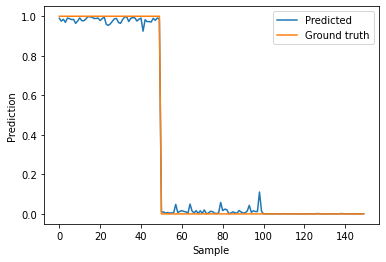

Accuracy: 100.00 %


In [30]:
predictions = []
 
m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0
 
plot.plot(range(m), predictions, label='Predicted')
plot.plot(range(m), y_train_samples, label='Ground truth')
plot.ylabel('Prediction')
plot.xlabel('Sample')
plot.legend(loc='best')
plot.show()
 
print('Accuracy: %.2f %%' % (100 * correct/m))